# Part I - (2019 Ford Go-Bike Project)
## by (Martins Okoye (Martinscode33@gmail.com) )

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

- The dataset contains 183215 observations across 15 columns, with 14 of those columns focusing on bike trip information and some user-related information.

### What is/are the main feature(s) of interest in your dataset?

- Trip duration may be the primary feature of interest in this dataset because it unquestionably affects the company's revenue. Because of this, i will investigate in this analysis how other characteristics, such as user type, trip start and end times, gender, and age, affect trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- The age and gender of the users should also have an impact on how long the trip lasts.
- When, in terms of the time of day, the day of the week, or the month of the year, are most travels taken?
- Customer or subscriber user types ought to have an impact on the trip's length.

### Data Wrangging

In [5]:
# Checking for null valvues
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# It is preferable to remove the missing station IDs and names as long as there are no alternative values.
# Additionally, as the member's birth year and gender Nan Values account for 8265 missing observations 
# (or 4.5 percent of the entire dataset), it is preferable to eliminate them from the dataset.
df.dropna(axis= 0, inplace=True)

In [7]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
df.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [9]:
df.shape

(174952, 16)

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [12]:
# Converting the start_time and end_time to correct dtypes
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [13]:
# Splitting date and time
df['Dates'] = pd.to_datetime(df['start_time']).dt.date
df['Time'] = pd.to_datetime(df['start_time']).dt.time

In [14]:
# Extracting start_time dayOfTheWeek from start_time
df['day_of_the_week'] = df['start_time'].dt.strftime('%a')

In [15]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
Dates                              object
Time                               object
day_of_the_week                    object
dtype: object

In [16]:
# day_of_the_week should be converted to category datatype for better analysis
weekdays = ['Fri','Sat','Sun','Mon','Tue','Wed','Thu']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered=True, categories = weekdays)
df['day_of_the_week'] = df['day_of_the_week'].astype(ordered_weekdays)

In [17]:
# Duration would be better if it was changed to mins than seconds
df['duration_min'] = df['duration_sec']/60

In [18]:
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [19]:
# Since 75% are less than an hour, start_hour would be extracted and used for analysis
df['start_hour'] = df['start_time'].dt.hour

In [20]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
Dates                              object
Time                               object
day_of_the_week                  category
duration_min                      float64
start_hour                          int64
dtype: object

In [21]:
# extract am or pm and store in new column
df['time_of_day']=pd.to_datetime(df.start_time).dt.strftime('%p')
# check column
df.time_of_day

0         PM
2         PM
3         PM
4         PM
5         PM
          ..
183407    AM
183408    AM
183409    AM
183410    AM
183411    AM
Name: time_of_day, Length: 174952, dtype: object

In [22]:
# Change the user_type data to category data
df['user_type'] = df['user_type'].astype('category')

# Change the datatype for bike share for all trip to boolean
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [23]:
# Extracting age from birth year column using 2019 to calculate since the dataset is from 2019
df['member_age'] = 2019 - df['member_birth_year']

In [24]:
# Changing datatype of member_age to int
df['member_age'] = df['member_age'].astype(int)

In [25]:
# Dropping columns that will not be used for analysis
df.drop(['duration_sec','start_time','end_time','bike_id','member_birth_year'],
        axis =1, inplace=True)

In [26]:
df.dtypes

start_station_id            float64
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
user_type                  category
member_gender                object
bike_share_for_all_trip        bool
Dates                        object
Time                         object
day_of_the_week            category
duration_min                float64
start_hour                    int64
time_of_day                  object
member_age                    int64
dtype: object

In [27]:
df.head(1)

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,Dates,Time,day_of_the_week,duration_min,start_hour,time_of_day,member_age
0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,Customer,Male,False,2019-02-28,17:32:10.145000,Thu,869.75,17,PM,35


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


##### Let's take a look at main features , starting with duration_min

 ## <font color='green'> Question</font>

- Is duration_min unimodal

In [28]:
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

 ## <font color='green'> Visualization</font>

(-10.0, 200.0, 0.0, 70000.0)

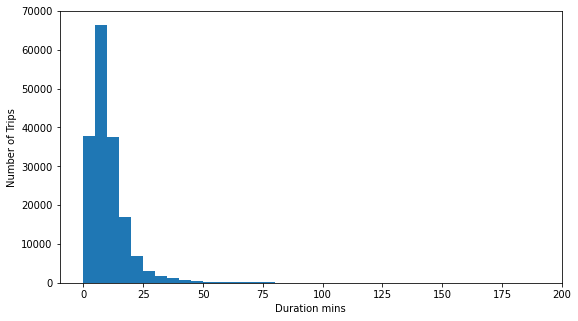

In [29]:
binsize = 5
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[9 , 5])
plt.hist(data=df, x = 'duration_min', bins = bins)
plt.xlabel('Duration mins')
plt.ylabel('Number of Trips')
plt.axis([-10, 200, 0, 70000])

Text(0.5, 0, 'Duration Min')

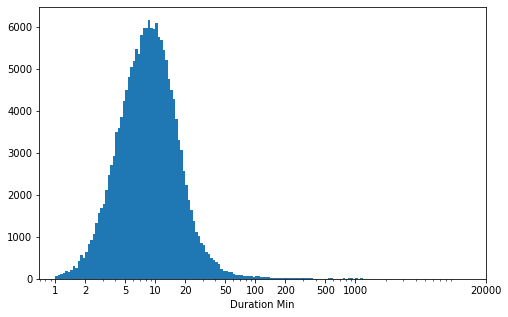

In [30]:
# Plotting on a large scale

log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max()) + log_binsize, log_binsize)

ticks_values = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 20000]

plt.figure(figsize=[8 , 5]);
plt.hist(data=df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks(ticks_values, ticks_values);
plt.xlabel('Duration Min')

 ## <font color='green'> Observation</font>

#### A log plot was necessary to show the duration min feature's unimodality because the right-skewed hist linear distribution had a lengthy tail.

 ## <font color='green'> Question</font>

### Which destination station is the most popular

In [31]:
# Creating function to check popular station
def plotHist(df, column):
    plt.figure(figsize=[8,6])
    bins = np.arange(0, df[column].max()+3, 0.5)
    plt.hist(data = df, x = column, bins = bins);

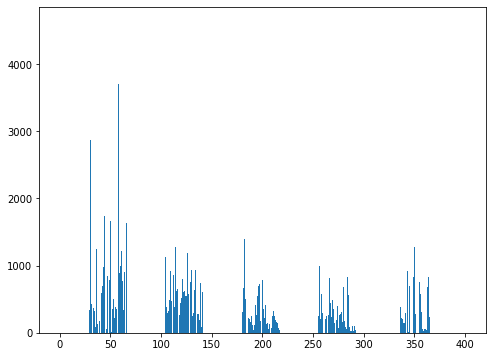

In [32]:
plotHist(df, 'end_station_id')

 ## <font color='green'> Observation</font>

#### The user destination variable investigation suggests that the busiest locations are those with ids around.

- 3-35 (Powell St BART Station (Market St at 4th St) - Cahil Park)
- 75-120 (Market St at Franklin St -Mission Dolores Park)
- 175 (49th St at Telegraph Ave )
- 250 (North Berkeley BART Station)

 ## <font color='green'> Question</font>

### which gender has a higer majority of bikers

In [33]:
# Function for plotting variable count

def count(df, column):
    count_type = df[column].value_counts()
    order = count_type.index
    sns.countplot (data= df, x= column, color= 'red', order= order)

 ## <font color='green'> Visualization</font>

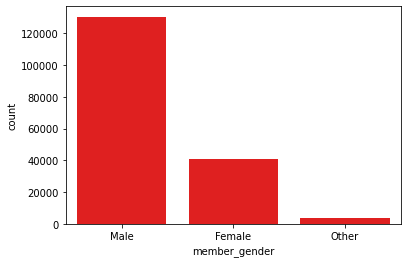

In [34]:
# count of the member gender categories
count(df, 'member_gender')

 ## <font color='green'> Observation</font>

#### The aforementioned diagram demonstrates that more men than women or other people use the bike-sharing service.

 ## <font color='green'> Question</font>

### What is the age distribution

 ## <font color='green'> Visualization</font>

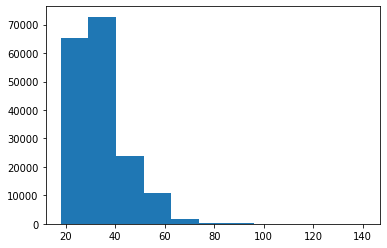

In [35]:
size = (df.member_age.max() - df.member_age.min()) / 11
bins = np.arange(df.member_age.min(), df.member_age.max()+ 2, size)
plt.hist(data=df, x = 'member_age',bins = bins);

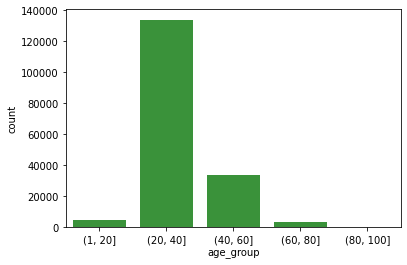

In [36]:
# creating an age_group column to help me see the distribution clearly and easily
df['age_group'] = pd.cut(x=df['member_age'], bins=[1, 20, 40, 60,80, 100]) 
# We can check the frequency of each bin
color = sns.color_palette()[2]
# plot graph
sns.countplot(data=df,x='age_group',color=color);

 ## <font color='green'> Observation</font>

According to this distribution, the majority of users are between the ages of 20 and 40, which makes sense given that fewer older persons may be motivated to ride bikes.

 ## <font color='green'> Question</font>

What is the user_type distribution

 ## <font color='green'> Visualization</font>

In [37]:
df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

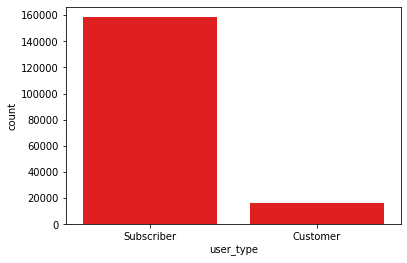

In [38]:
count(df, 'user_type')

 ## <font color='green'> Observation</font>

This demonstrates that subscribers are more likely to use the service this month.

 ## <font color='green'> Question</font>

Which day has more frequnency

 ## <font color='green'> Visualization</font>

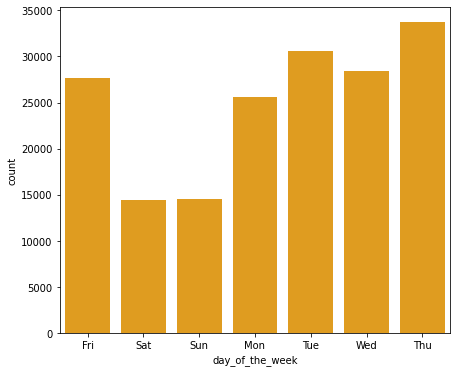

In [39]:
plt.figure(figsize=[7,6])
color=sns.color_palette()[2]
sns.countplot(data=df,x='day_of_the_week',color='orange');

 ## <font color='green'> Observation</font>

We can conclude thursday is the most frequently enagaging day

 ## <font color='green'> Question</font>

### What is the gender distribution

 ## <font color='green'> Visualization</font>

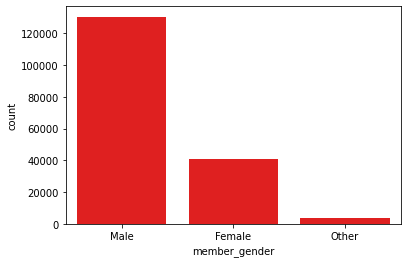

In [40]:
count(df, 'member_gender')

 ## <font color='green'> Observation</font>

- This plot demonstrates that "males" use the service at a higher rate than "females" and "others" of any gender.

 ## <font color='green'> Question</font>

### Do poeple like the bike share for all service?



 ## <font color='green'> Visualization</font>

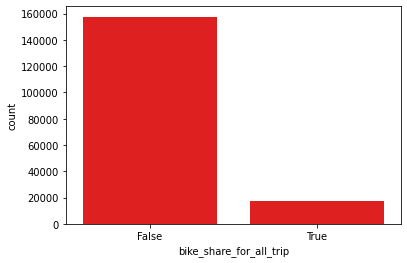

In [41]:
count(df,'bike_share_for_all_trip')

 ## <font color='green'> Observation</font>

### Many poeple dont use the bike share for all trip



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I changed the name of the duration sec variable to duration min because it was originally in seconds and was converted to minutes for ease of comprehension. Plotting it initially revealed a long tail and a rightward skewness. To observe the true distribution, I changed the scale and bin sizes to log, and I discovered that this variable is truly unimodal, with a peak about 100 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To better observe and analyze the associations, I converted the user age variable into a qualitative variable of age. The member gender, end station id, and member birth year columns were affected when I removed missing data from the dataset. 197 instances in the end station id, or 0.1 percent of the data, and 8265 instances on the member gender, or 4.5 percent of the data, respectively.

## Bivariate Exploration


 ## <font color='green'> Question</font>

### Distribution of one category by another

 ## <font color='green'> Visualization</font>

In [42]:
## Creating function for Count Plot
def countPlot(data, x, hue):
    plt.figure(figsize=[10,8])
    sns.countplot(data= data, x= x, hue=hue)

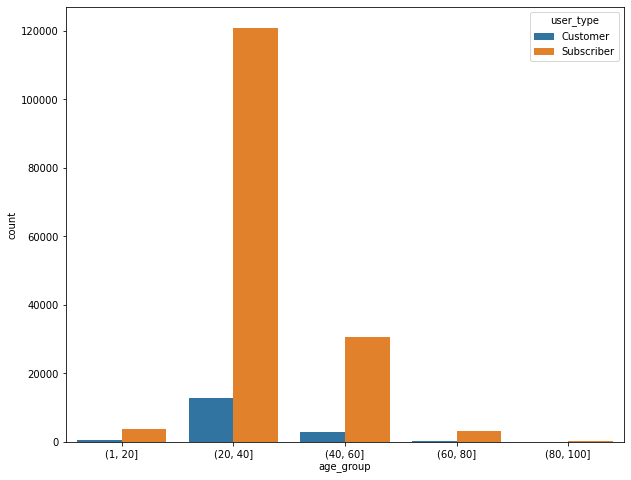

In [43]:
# UserType by Age Group
countPlot(df, 'age_group', 'user_type')

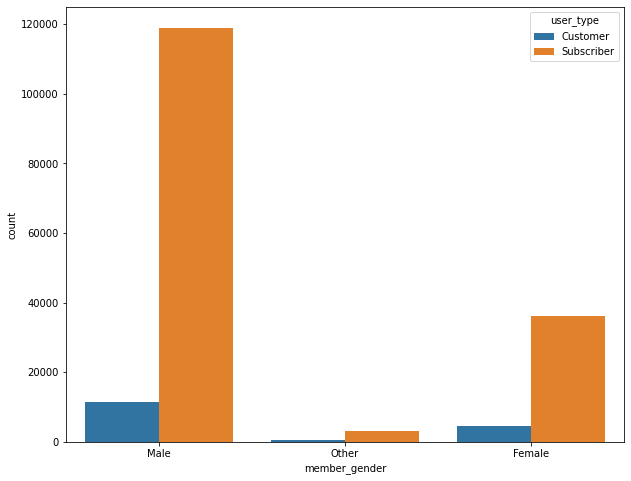

In [44]:
#User Type by Gender
countPlot(df, 'member_gender', 'user_type')

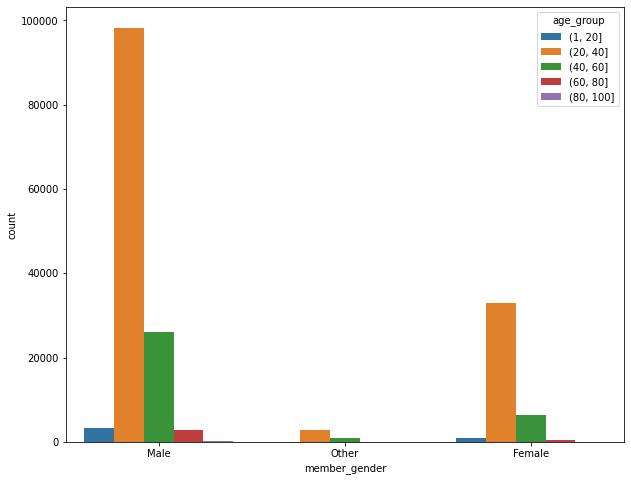

In [45]:
# Age by Gender
countPlot(df, 'member_gender', 'age_group')

 ## <font color='green'> Observation</font>

### Since all categories are evenly dispersed throughout all age groups, there is no definite group that indicates that a particular age group tends to be subscribers rather than customers. Instead, the data supports the pattern that subscribers who are male and between the ages of 20 and 40 interact more with the ford bike service's products.

 ## <font color='green'> Question</font>

#### What is total riding duration for all gender

 ## <font color='green'> Visualization</font>

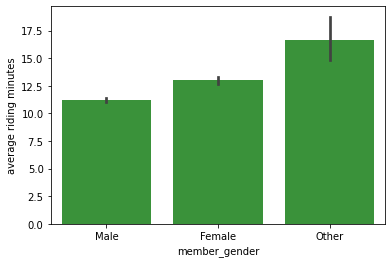

In [46]:
order=df.member_gender.value_counts().index
sns.barplot(data=df,x='member_gender',y='duration_min',color=color,order=order);
plt.ylabel('average riding minutes');


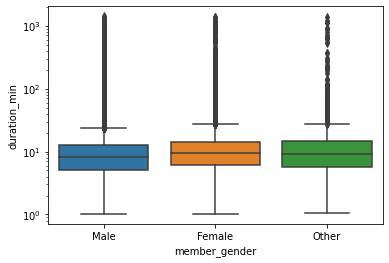

In [47]:
sns.boxplot(data=df,x='member_gender',y='duration_min',order=order);
plt.yscale('log');

 ## <font color='green'> Observation</font>

### Similar to the user type variable, this member gender variable also exhibits a tendency where categories with fewer counts have higher means and median values, indicating the importance of these categories.

 ## <font color='green'> Question</font>

#### What is the total distribution of days across different  gender

 ## <font color='green'> Visualization</font>

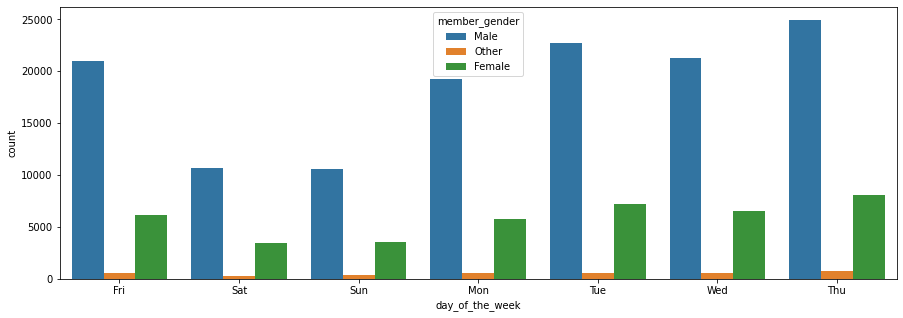

In [48]:
plt.figure(figsize=[15,5])
sns.countplot(data=df,x='day_of_the_week',hue='member_gender');

 ## <font color='green'> Observation</font>

#### There are no surprises because men continue to dominate interaction because they are so many.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I've already begun to observe solutions to the query I put to the dataset at this point in the research. First, I saw that people between the ages of 20 and 40 were much more engaged than other users. Based on numbers, I also found that subscriber type users were more engaged than customer type users, but subsequent research showed that even if customer type users are less numerous, they are still more engaged when it comes to average riding length. A similar pattern can be found in the member gender column, where the mean riding duration was longer for the less common genders. Male subscribers between the ages of 20 and 40 had longer average riding times but longer overall riding times.

> This implies that people take less longer excursions while using the service.



## Multivariate Exploration



 ## <font color='green'> Question</font>

- To visualize the statistics of duration_min over user_type and member_gender variables

 ## <font color='green'> Visualization</font>

/home/martins/notebook/jupyter-notebook/lib/python3.10/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/martins/notebook/jupyter-notebook/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


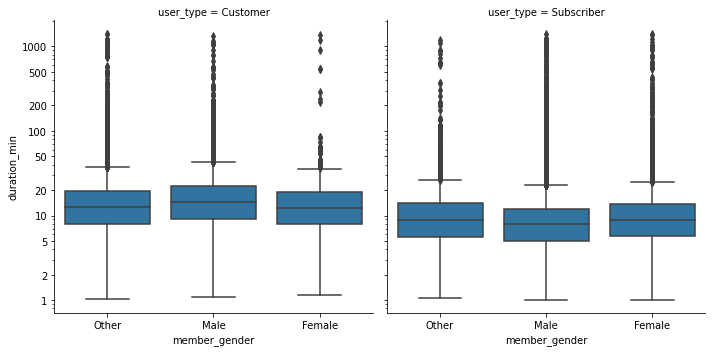

In [49]:
plot = sns.FacetGrid(data = df, col = 'user_type', size = 5)
plot .map(sns.boxplot, 'member_gender', 'duration_min');
plt.yscale('log')
y_loc=[1,2,5,10,20,50,100,200,500,1000]
y_ticks=['{}'.format(v) for v in y_loc]
plt.yticks(y_loc,y_ticks);

<font color='green'> Obersavation</font>
- Compared to Customer type, Subscribers have bigger numbers but lower median values.

In [50]:
# Creating function for Point Plot
def pointPlot(data, x, y, hue, col):
    sns.pointplot(data = data, x= x, y= y, hue = hue,linestyles='',dodge=0.4);
    plt.legend(loc = 9, ncol = 3, framealpha = 0.5, title = col);

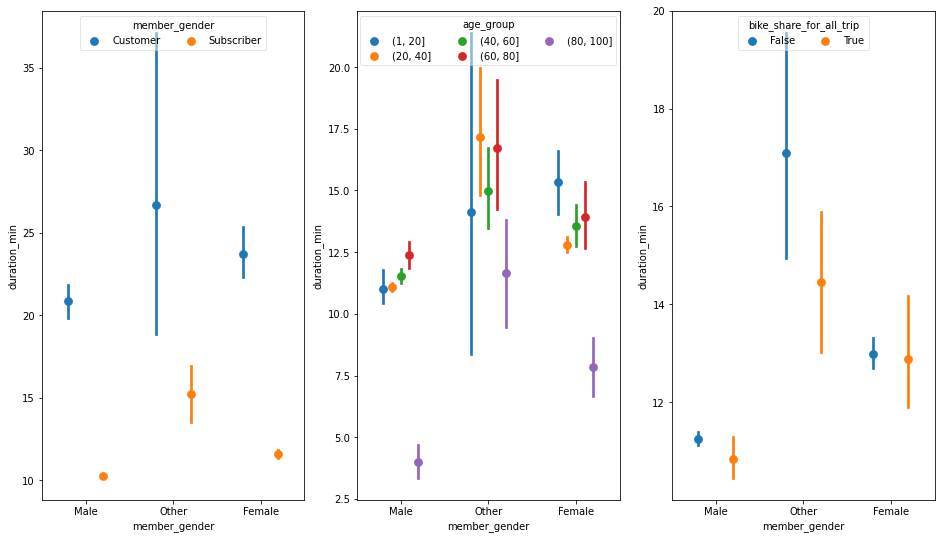

In [51]:
plt.figure(figsize = [16,9])
# df.member_gender.value_counts().index 
plt.subplot(1,3,1)
pointPlot(df, 'member_gender', 'duration_min', 'user_type', 'member_gender')
plt.subplot(1,3,2)

pointPlot(df, 'member_gender', 'duration_min', 'age_group', 'age_group')
plt.subplot(1,3,3)

pointPlot(df, 'member_gender', 'duration_min', 'bike_share_for_all_trip', 'bike_share_for_all_trip')


<font color='green'> Obersavation</font>
- Generally, categories with smaller numbers have minutes of duration that are larger on average.
- The distribution of the "other gender" is rather erratic.
- As might be expected, the age group of 80 to 100 has the shortest average duration in minutes.
- Very little variation in subscribers between the ages of 20 and 40 who don't use the bike share service   exclusively

In [64]:
# Creating function for CatPlot
def catPlot(data, x, y, hue):
    sns.catplot(data = data, x=x, y=y,hue=hue, kind= 'point', dodge = 0.4, col= 'time_of_day', linestyle= '');

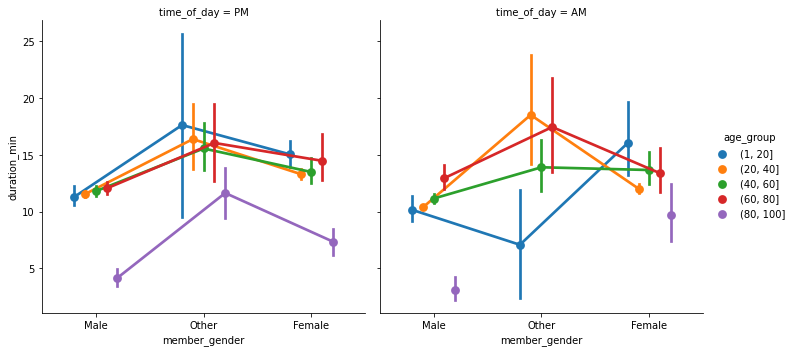

In [65]:
catPlot(df, 'member_gender', 'duration_min', 'age_group')

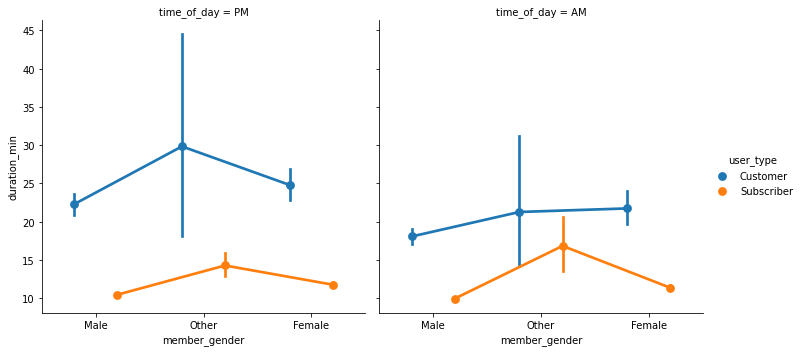

In [70]:
catPlot(df, 'member_gender', 'duration_min', 'user_type')

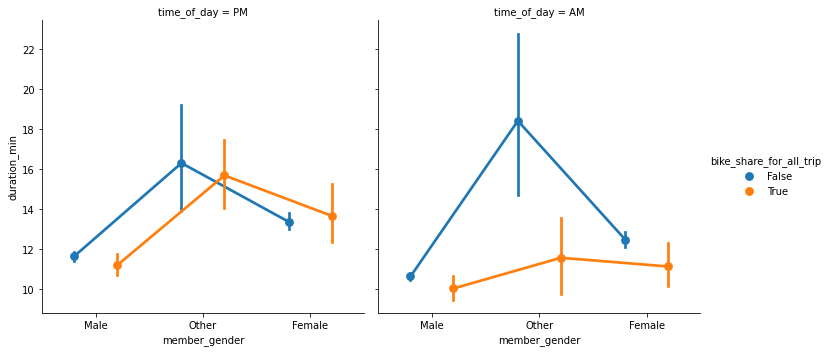

In [71]:
catPlot(df, 'member_gender', 'duration_min', 'bike_share_for_all_trip')

<font color='green'> Obersavation</font>
- Both mornings and evenings exhibit the typical significant variance in the "other" gender group.
- Male Subscribers 20 to 40 years old who don't utilize the bike share for all service are the demographic that generates the most money for the company.
- People of the "other" gender who use the bike share for all services as subscribers are the demographic that generates the least revenue.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It was simpler to recognize and comprehend data trends by extending correlations between length minutes and the other qualitative characteristics in this case, and it was also easier to develop categories that interact with the Ford Go-bike services more.

